# Load Data

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

train_csv = pd.read_csv("data/Training_set.csv")
test_csv = pd.read_csv("data/Testing_set.csv")

train_csv.head()


,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


# Dataset Summary

Total training images: 6499
Unique butterfly classes: 75


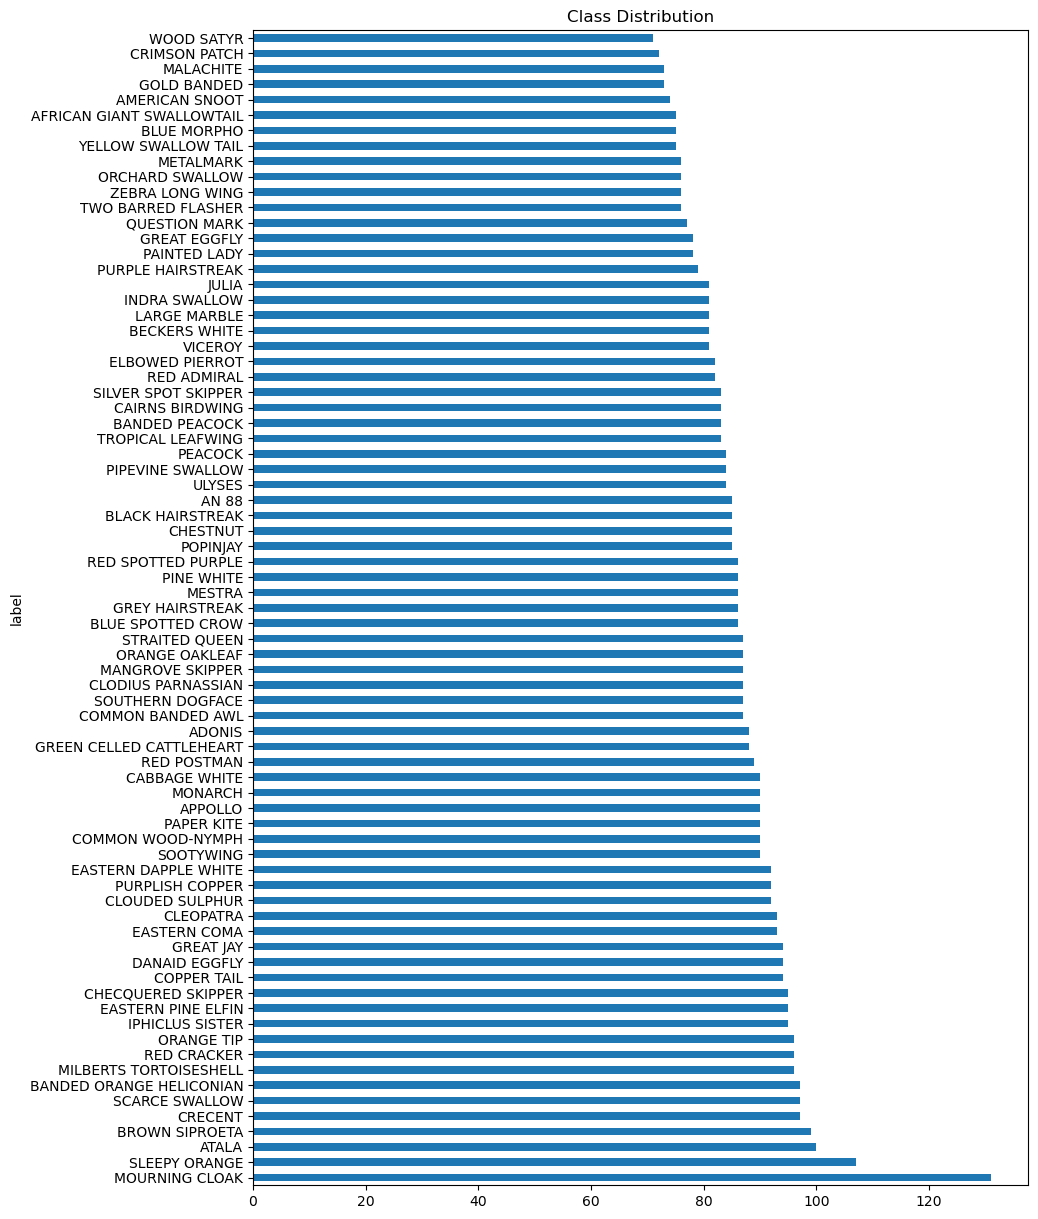

In [2]:
print(f"Total training images: {len(train_csv)}")
print(f"Unique butterfly classes: {train_csv['label'].nunique()}")
train_csv['label'].value_counts().plot(kind='barh', figsize=(10, 15))
plt.title("Class Distribution")
plt.show()


# Sample Images

Class: SOUTHERN DOGFACE


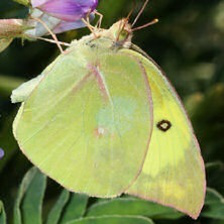

Class: ADONIS


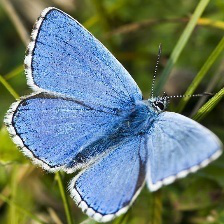

Class: BROWN SIPROETA


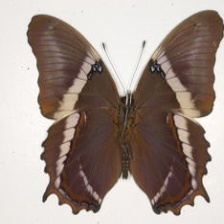

Class: MONARCH


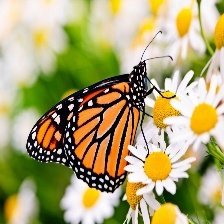

Class: GREEN CELLED CATTLEHEART


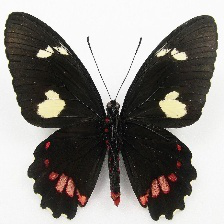

Class: CAIRNS BIRDWING


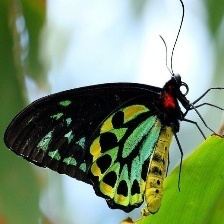

Class: EASTERN DAPPLE WHITE


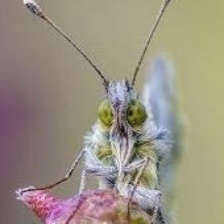

Class: RED POSTMAN


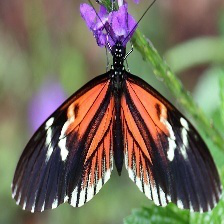

Class: MANGROVE SKIPPER


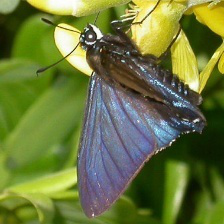

Class: BLACK HAIRSTREAK


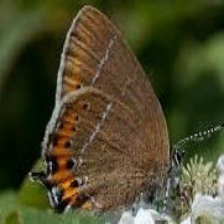

In [3]:
import random
from PIL import Image
from IPython.display import display

sample_classes = train_csv['label'].unique()[:10]

for label in sample_classes:
    sample_path = train_csv[train_csv['label'] == label]['filename'].iloc[0]
    img = Image.open(f"data/train/{sample_path}")
    print(f"Class: {label}")
    display(img)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Encode labels
le = LabelEncoder()
train_csv['encoded_label'] = le.fit_transform(train_csv['label'])

# Train-validation split
train_df, val_df = train_test_split(train_csv, test_size=0.2, stratify=train_csv['encoded_label'], random_state=42)

# Image generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_dataframe(
    train_df,
    directory="data/train",
    x_col="image_id",
    y_col="label",
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    val_df,
    directory="data/train",
    x_col="image_id",
    y_col="label",
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights="imagenet")
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(75, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
